### Importing Packages

In [7]:
import numpy as np
# Plotting lib
import matplotlib.pyplot as plt
# To protect the original data, use the "copy" package
import copy

# Case study: Morse Code in analog and digital signal

### necessary functions

#### Morse code dictionary

In [8]:
MORSE_CODE_DICT = { 'A':'.-', 'B':'-...',
                    'C':'-.-.', 'D':'-..', 'E':'.',
                    'F':'..-.', 'G':'--.', 'H':'....',
                    'I':'..', 'J':'.---', 'K':'-.-',
                    'L':'.-..', 'M':'--', 'N':'-.',
                    'O':'---', 'P':'.--.', 'Q':'--.-',
                    'R':'.-.', 'S':'...', 'T':'-',
                    'U':'..-', 'V':'...-', 'W':'.--',
                    'X':'-..-', 'Y':'-.--', 'Z':'--..',
                    '1':'.----', '2':'..---', '3':'...--',
                    '4':'....-', '5':'.....', '6':'-....',
                    '7':'--...', '8':'---..', '9':'----.',
                    '0':'-----', ', ':'--..--', '.':'.-.-.-',
                    '?':'..--..', '/':'-..-.', '-':'-....-',
                    '(':'-.--.', ')':'-.--.-'}

#### Message to Morse encryption

In [9]:
# Function to encrypt the string
# according to the morse code chart
def encrypt(message):
    cipher = ''
    for letter in message:
        if letter != ' ':

            # Looks up the dictionary and adds the
            # corresponding morse code
            # along with a space to separate
            # morse codes for different characters
            cipher += MORSE_CODE_DICT[letter] + ' '
        else:
            # 1 space indicates different characters
            # and 2 indicates different words
            cipher += ' '

    return cipher

#### Morse to Message decryption

In [10]:
# Function to decrypt the string
# from morse to english
def decrypt(message):
 
    # extra space added at the end to access the
    # last morse code
    message += ' '
 
    decipher = ''
    citext = ''
    for letter in message:
 
        # checks for space
        if (letter != ' '):
 
            # counter to keep track of space
            i = 0
 
            # storing morse code of a single character
            citext += letter
 
        # in case of space
        else:
            # if i = 1 that indicates a new character
            i += 1
 
            # if i = 2 that indicates a new word
            if i == 2 :
 
                 # adding space to separate words
                decipher += ' '
            else:
 
                # accessing the keys using their values (reverse of encryption)
                decipher += list(MORSE_CODE_DICT.keys())[list(MORSE_CODE_DICT
                .values()).index(citext)]
                citext = ''
 
    return decipher

## Sender

In this section, we simulate a message sender. 

### Communication Protocol

But first, we need to define our protocol of encoding and decoding frequency and standardize the signal for the transmission.

In [11]:
# You can define these values.
# Morse communication Frequency in [Hz]
MORSE_COM_FREQ = 5



""" 
We need a continuous time array for us to keep track of the continuous analog signals.
But in the computational world, there's no true continuous time domain.
Everything is eventually in discrete time.

So here we create an array for continuous time, 
this array will be very big and the time steps between each value will be so small,
smaller than our Morse communication period, so it can be seen as "continues"
"""

# Do not change the code below if you don't know what you are doing!
# Plotting START & END time in [s]
T_CONT_START = 0
T_CONT_END = 15


# Continues Time domain plotting Data storage Frequency in [Hz]
T_CONT_FREQ = 100
# A calculation turns the frequency to the period in [s]
T_COUNT_PERIOD = 1/T_CONT_FREQ


# Get the total time
Time_span = T_CONT_END - T_CONT_START
# Calculate how many elements should be in the Continues Time plotting Data Array
# And force it to be int.
t_steps = int (Time_span*T_CONT_FREQ)


# Generate an Array for continuous time
T_CONT = np.linspace(T_CONT_START,T_CONT_END,t_steps + 1)



"""
Standardized signal to represent the Morse Signal:

".": 1 ON & 2 OFF
"-": 2 ON & 1 OFF
" ": 2 OFF

Below you see the Function that turns these into ON and OFF signals.
"""

def code_to_signal(t_cont: np.array,                
                   morse_code,
                   morse_com_freq):
  
  # A calculation turns the frequency to the period in [s]
  # The period defines how long a "." is (represented in signal as on)
  period = 1/morse_com_freq
  
  # Generate an empty array matching the size of the continuous time array
  # for signal data storage
  morse_signal = np.zeros(t_cont.size)

  e = 0
  i = 0

  # Check if counter within both array
  while ((e < len(morse_code)) and (i < t_cont.size - 1)):
    # If yes, read the current character in Morse code and 
    # determine what to write on the signal data storage
    
    """
    ".": 1 ON & 2 OFF
    "-": 2 ON & 1 OFF
    " ": 2 OFF
    """
    
    if morse_code[e] == '.':

      on_end = t_cont[i] + period
      off_end = t_cont[i] + 2*period

    if morse_code[e] == "-":
      on_end = t_cont[i] + 2*period
      off_end = t_cont[i] + 3*period

    if morse_code[e] == " ":
      on_end = t_cont[i]
      off_end = t_cont[i] + 2*period

    # After determining how long and what to write, write the signal on the data array
    while ((t_cont[i] < on_end) and (i < t_cont.size - 1)):
      # Write the ON state
      morse_signal[i] = 1
      i = i + 1

    while ((t_cont[i] <= off_end) and (i < t_cont.size - 1)):
      # Write the OFF state
      morse_signal[i] = 0
      i = i + 1

    e = e + 1
    
  return morse_signal

### Message to send (type your message in the code)

In [13]:
# Message to send
MESSAGE = " I love CS 2"


# Morse Code Encryption
Morse_code_To_Send = encrypt(MESSAGE.upper())
print(Morse_code_To_Send)

 ..  .-.. --- ...- .  -.-. ...  ..--- 


### Morse Code to Analog Signal

 ..  .-.. --- ...- .  -.-. ...  ..--- 


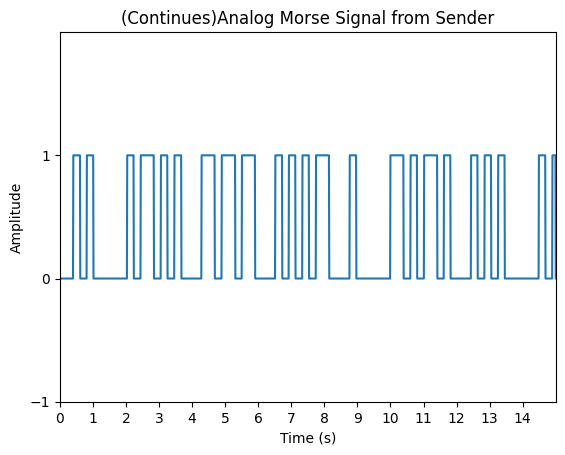

In [41]:
# We defined the code to signal function above in the communication protocol section.
CONT_Morse_Signal_Send = code_to_signal(T_CONT,Morse_code_To_Send,MORSE_COM_FREQ)

print(Morse_code_To_Send)


# Plot out the continuous signal
fig, ax = plt.subplots()
ax.plot(T_CONT,CONT_Morse_Signal_Send)
ax.set_title("(Continues)Analog Morse Signal from Sender")
ax.set(xlim=(T_CONT_START,T_CONT_END),
       xticks=np.arange(T_CONT_START, T_CONT_END),
       ylim=(-0.5, 2),
       yticks=np.arange(-1, 2))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Transmission and introduce noise

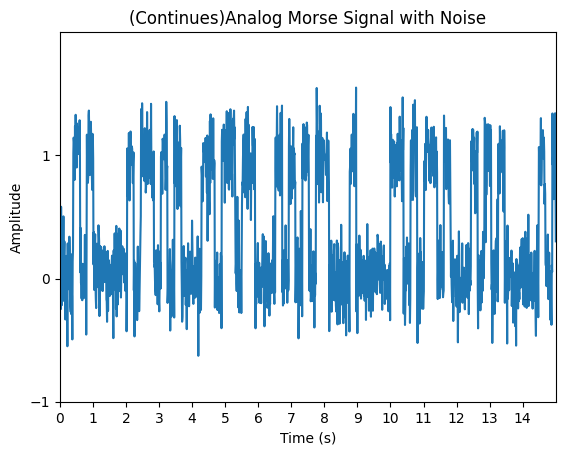

In [40]:
CONT_Morse_Signal_w_noise = CONT_Morse_Signal_Send + 0.2 * np.random.normal(size=len(T_CONT))

# Plot out the continuous signal with noise introduced
fig, ax = plt.subplots()
ax.plot(T_CONT,CONT_Morse_Signal_w_noise)
ax.set_title("(Continues)Analog Morse Signal with Noise")
ax.set(xlim=(T_CONT_START,T_CONT_END),
       xticks=np.arange(T_CONT_START, T_CONT_END),
       ylim=(-0.5, 2),
       yticks=np.arange(-1, 2))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Receiver ADC

In [43]:
# Define the sampling frequency of your Receiver (Analog to Digital converter) in [Hz]
RECEIVER_FREQ = 5



def analog_digital_converter(t_cont: np.array,cont_signal: np.array,freq):
 # Converting the Sampling frequency to the sampling period.

    return None

    